In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 48.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


> **Importação dos módulos necessários**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

> **Leitura e ordenação dos dados**

In [ ]:
df = pd.read_csv('sp_dataset.csv')
# Convertendo coluna date para um datetime
df["date"] = pd.to_datetime(df["date"])
# Ordenando pela coluna date
df = df.sort_values(by="date")
df.head(15)

,index,region,country,city,month,day,year,celsius,date,__dt
3268,1302134,South/Central America & Carribean,Brazil,Sao Paulo,4,8,1997,17.5,1997-04-08,2022-03-27 00:00:00.000
3267,1302135,South/Central America & Carribean,Brazil,Sao Paulo,4,9,1997,17.9,1997-04-09,2022-03-27 00:00:00.000
3269,1302136,South/Central America & Carribean,Brazil,Sao Paulo,4,10,1997,18.3,1997-04-10,2022-03-27 00:00:00.000
3270,1302137,South/Central America & Carribean,Brazil,Sao Paulo,4,11,1997,19.4,1997-04-11,2022-03-27 00:00:00.000
3271,1302138,South/Central America & Carribean,Brazil,Sao Paulo,4,12,1997,21.2,1997-04-12,2022-03-27 00:00:00.000
3272,1302139,South/Central America & Carribean,Brazil,Sao Paulo,4,13,1997,20.5,1997-04-13,2022-03-27 00:00:00.000
3273,1302140,South/Central America & Carribean,Brazil,Sao Paulo,4,14,1997,21.4,1997-04-14,2022-03-27 00:00:00.000
3274,1302141,South/Central America & Carribean,Brazil,Sao Paulo,4,15,1997,21.6,1997-04-15,2022-03-27 00:00:00.000
3275,1302142,South/Central America & Carribean,Brazil,Sao Paulo,4,16,1997,21.6,1997-04-16,2022-03-27 00:00:00.000
3276,1302143,South/Central America & Carribean,Brazil,Sao Paulo,4,17,1997,21.1,1997-04-17,2022-03-27 00:00:00.000


> **Deletando as  colunas " index" e "__dt "**

In [ ]:
df = df.drop(['index','__dt'], axis=1)
df

,region,country,city,month,day,year,celsius,date
3268,South/Central America & Carribean,Brazil,Sao Paulo,4,8,1997,17.5,1997-04-08
3267,South/Central America & Carribean,Brazil,Sao Paulo,4,9,1997,17.9,1997-04-09
3269,South/Central America & Carribean,Brazil,Sao Paulo,4,10,1997,18.3,1997-04-10
3270,South/Central America & Carribean,Brazil,Sao Paulo,4,11,1997,19.4,1997-04-11
3271,South/Central America & Carribean,Brazil,Sao Paulo,4,12,1997,21.2,1997-04-12
...,...,...,...,...,...,...,...,...
1169,South/Central America & Carribean,Brazil,Sao Paulo,5,9,2020,16.5,2020-05-09
1171,South/Central America & Carribean,Brazil,Sao Paulo,5,10,2020,17.6,2020-05-10
1173,South/Central America & Carribean,Brazil,Sao Paulo,5,11,2020,18.8,2020-05-11
1172,South/Central America & Carribean,Brazil,Sao Paulo,5,12,2020,19.3,2020-05-12


> **Exibindo informações das colunas**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8346 entries, 3268 to 1174
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   region   8346 non-null   object        
 1   country  8346 non-null   object        
 2   city     8346 non-null   object        
 3   month    8346 non-null   int64         
 4   day      8346 non-null   int64         
 5   year     8346 non-null   int64         
 6   celsius  8346 non-null   float64       
 7   date     8346 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 586.8+ KB


> **Exibindo as colunas "date" e "celsius"**

In [ ]:
df_temp = df[['date','celsius']]
df_temp

,date,celsius
3268,1997-04-08,17.5
3267,1997-04-09,17.9
3269,1997-04-10,18.3
3270,1997-04-11,19.4
3271,1997-04-12,21.2
...,...,...
1169,2020-05-09,16.5
1171,2020-05-10,17.6
1173,2020-05-11,18.8
1172,2020-05-12,19.3


> **Plotando o gráfico de temperatura por período**

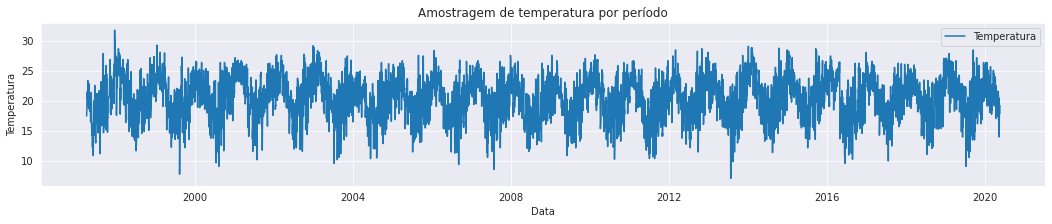

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize =(18, 3))
plt.title("Amostragem de temperatura por período")
plt.xlabel("Data")
plt.ylabel("Temperatura")
sns.lineplot(data=df, x='date', y='celsius', label='Temperatura')

> **Amostra de variações em periodo de 12 meses**

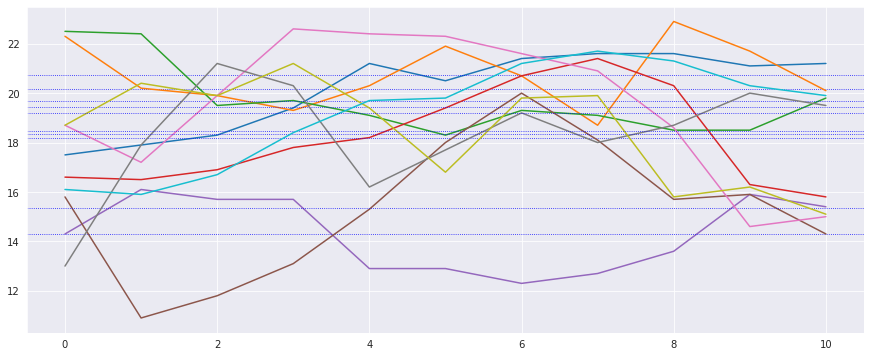

In [ ]:
fig, ax = plt.subplots(1, 1, figsize= (15, 6))

for idx in range(10):
    from_date = (idx * 12 )
    to_date = ((idx+1) * 12 - 1)
    values = df_temp["celsius"].iloc[from_date:to_date ].values
    ax.plot(values)
    ax.axhline(y=np.mean(values), color="b", lw=.8, ls=":")

> **Transformando a coluna "celsius" em uma decomposição temporal**

In [ ]:
result = seasonal_decompose(df_temp["celsius"], period=12, model="additive")

> **Amostras de variações temporais em  tendência, sazionalidade e resíduo**

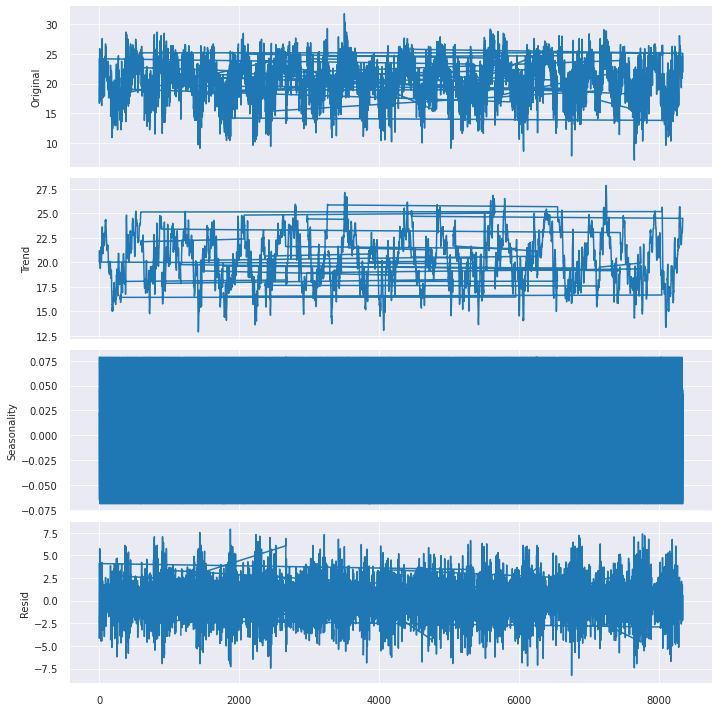

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

result.observed.plot(ax=axes[0])
axes[0].set_ylabel("Original")
axes[0].yaxis.grid(True)

result.trend.plot(ax=axes[1])
axes[1].yaxis.grid(True)
axes[1].set_ylabel("Trend")

result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel("Seasonality")
axes[2].yaxis.grid(True)

result.resid.plot(ax=axes[3])
axes[3].set_ylabel("Resid")
axes[3].yaxis.grid(True)

sns.despine(offset=5, trim=False)
fig.tight_layout()

> **Mostragem das tendências de variações**

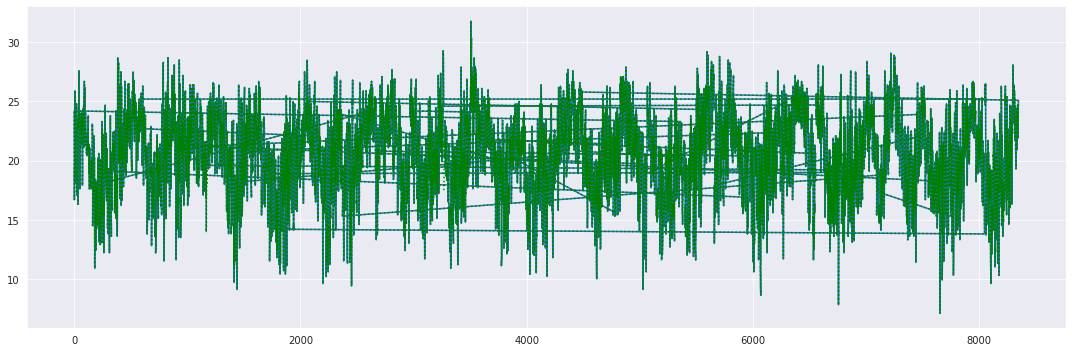

In [ ]:
indices_trend_null = result.trend.isna()

recomposition = (result.trend[~indices_trend_null] 
                 + result.seasonal[~indices_trend_null]
                 + result.resid[~indices_trend_null])

ax = recomposition.plot(figsize=(15,5))
df_temp["celsius"].plot(color="g", ls=":", ax=ax)

ax.grid(True)
fig = plt.gcf()
fig.tight_layout()

> **Verificação de série de residuos**

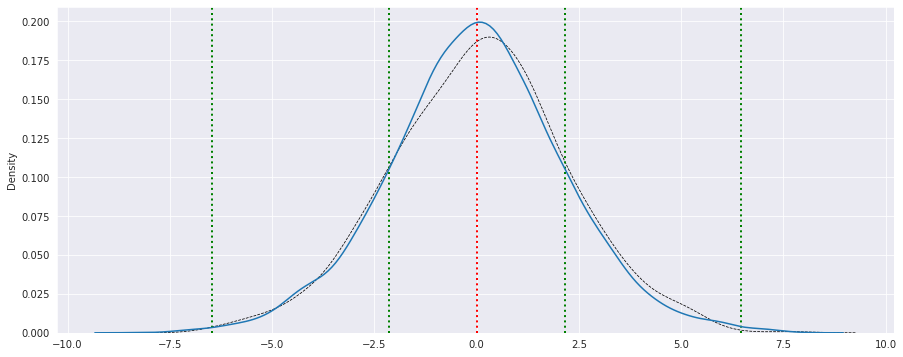

In [ ]:
fig, ax = plt.subplots( 1, 1, figsize=(15, 6))

sigma = np.nanstd(result.resid.values)
mu = np.nanmean(result.resid.values)
normal = np.random.normal(mu, sigma, 1000)
sns.kdeplot( normal, color='k', ls="--", lw=0.75)
ax.axvline(x=mu, color='red', lw=2, ls=":")

ax.axvline(x=mu + 1 * sigma, color='green', lw=2, ls=":")
ax.axvline(x=mu - 1 * sigma, color='green', lw=2, ls=":")

ax.axvline(x=mu + 3 * sigma, color='green', lw=2, ls=":")
ax.axvline(x=mu - 3 * sigma, color='green', lw=2, ls=":")

sns.kdeplot(result.resid.values, ax=ax)


**Removendo efeitos cumulativos da série**

In [ ]:
from statsmodels.tsa.stattools import adfuller

def print_adfuller_test(serie):
    test = adfuller(serie)
    print(f"Test: {test[0]:.2f} p-value: {test[1]:.3f}"
          f" criticals: <1% = {test[4]['1%']:.2f}  5% = {test[4]['5%']:.2f}"
          f" 10% = {test[4]['10%']:.2f} > ")

print_adfuller_test(df_temp["celsius"])

Test: -7.13 p-value: 0.000 criticals: <1% = -3.43  5% = -2.86 10% = -2.57 > 


Test: -22.17 p-value: 0.000 criticals: <1% = -3.43  5% = -2.86 10% = -2.57 > 


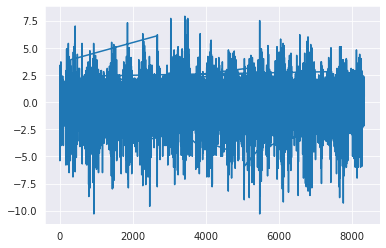

In [ ]:
serie_diff = df_temp["celsius"].diff()

serie_diff.dropna().plot()
print_adfuller_test(serie_diff.dropna())

**Transformação em série estácionaria dentro de 12 meses**

Test: -28.26 p-value: 0.000 criticals: <1% = -3.43  5% = -2.86 10% = -2.57 > 


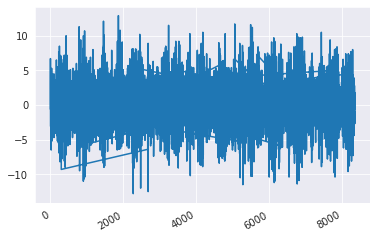

In [ ]:
fig, ax = plt.subplots(1,1)
serie_diff_2  = df_temp["celsius"].diff().shift(12) - df_temp["celsius"].diff()
ax = serie_diff_2.dropna().plot(ax=ax)
print_adfuller_test(serie_diff_2.dropna())

fig.autofmt_xdate()


**Amostra de estácionamento de residuo**

Test: -28.30 p-value: 0.000 criticals: <1% = -3.43  5% = -2.86 10% = -2.57 > 


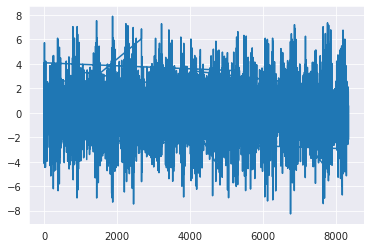

In [ ]:
result.resid.plot()
print_adfuller_test(result.resid.dropna())

# Importação do modelo ARIMA

> 



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

 **Modelagem do ARIMA**

In [ ]:
model = ARIMA(result.resid.dropna(), order=(1, 1, 1))
result_arima = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**Aplicando o Arima a séries residuais**

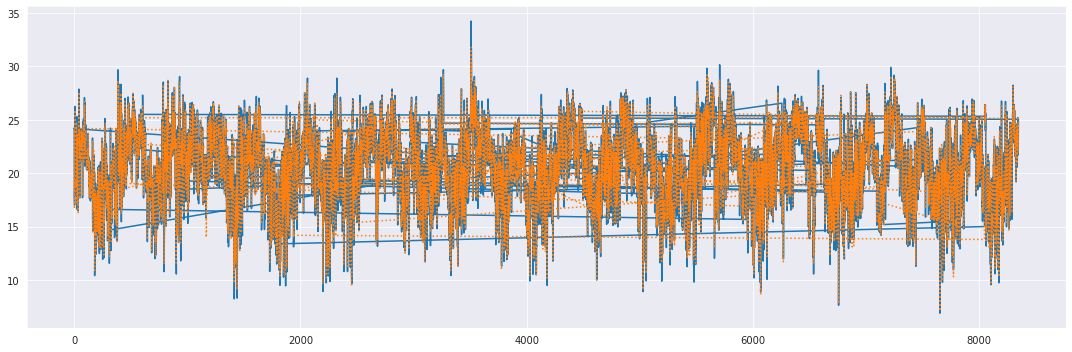

In [ ]:
fitted_values = result_arima.fittedvalues
indices_trend_null = result.trend.isna()

recomposition = (result.trend[~indices_trend_null] 
                 + result.seasonal[~indices_trend_null]
                 + fitted_values[~indices_trend_null])

ax = recomposition.plot(figsize=(15,5))
df_temp["celsius"].plot(ls=":", ax=ax)

ax.grid(True)
fig = plt.gcf()
fig.tight_layout()

#  Modelo Prophet##

**Importação da biblioteca prophet**

In [ ]:
from fbprophet import Prophet

In [ ]:
df_temp.set_index('date', inplace=True)

**Motando modelo de predição para Prophet**




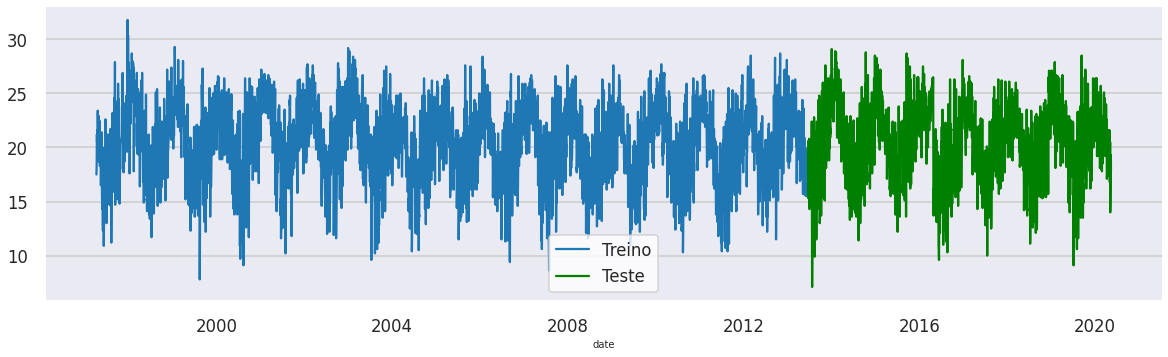

In [ ]:
size_of_train = int(np.ceil(df_temp.shape[0] * 0.70))
train = df_temp.iloc[:size_of_train]
test = df_temp.iloc[size_of_train:]

fig, ax= plt.subplots(1, 1, figsize=(20, 6))
sns.set_style("ticks")
sns.set_context("talk")

train.plot(ax=ax)
test.plot(ax=ax, c="g")
ax.yaxis.grid(True)
ax.legend(["Treino", "Teste"])
sns.despine(offset=5, trim=False)

**Renomeando as colunas para implementação do modelo**

In [ ]:
#date -> 'ds' | celsius -> 'Y'
train_prophet = train.reset_index().rename(columns={'date': 'ds', 'celsius': 'y'})
train_prophet.head()	

,ds,y
0,1997-04-08,17.5
1,1997-04-09,17.9
2,1997-04-10,18.3
3,1997-04-11,19.4
4,1997-04-12,21.2


## Parâmetros de amostragem

**Definindo o modelo para uma série temporal em 1 ano**

In [ ]:
model = Prophet(yearly_seasonality=12, seasonality_mode="multiplicative")
model.fit(train_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Definindo o periodo da predição**

In [ ]:
future = model.make_future_dataframe(periods=20, freq="MS")
forecast = model.predict(future)

**Gráfico de predição utilizando o modelo Prophet**

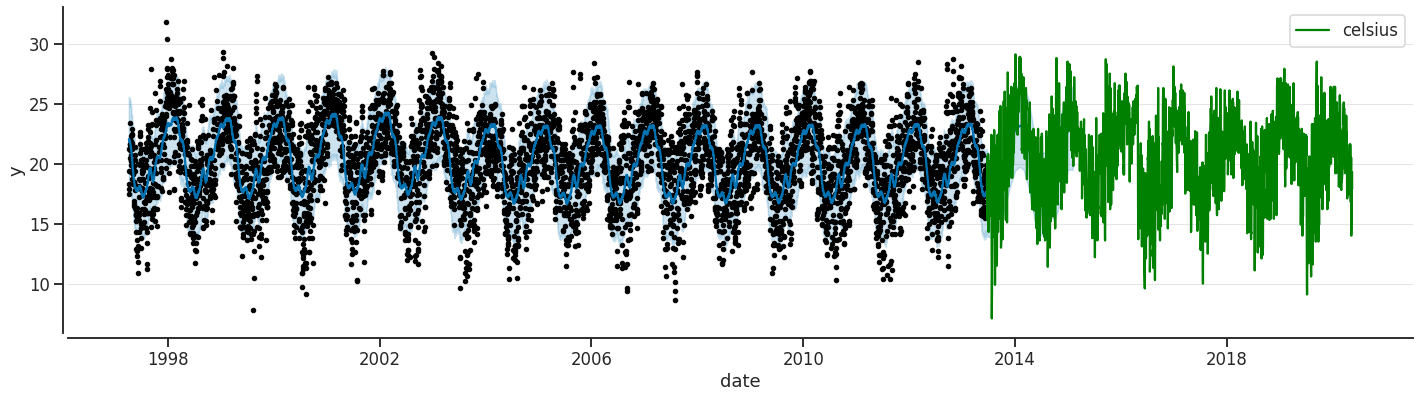

In [ ]:
fig, ax= plt.subplots(1, 1, figsize=(20, 6))
sns.set_style("ticks")

sns.set_context("talk")
model.plot(forecast, ax=ax);

test.plot(ax=ax, c="g");
ax.yaxis.grid(True)

sns.despine(offset=5, trim=False)